# ADS500B
## House Sales Washington

This dataset contains details of house sales in neighborhoods of King County, Washington. 
It includes data for houses sold between May 2014 and May 2015.  

Origin: Kaggle
File Type: CSV
File Size: 2.5 MB
Modeling Problem: Regression
Missing Values: Yes

Attributes:
id - a numerical identity field for each house sale 

date - date when the house is sold

price - house sale price amount in US dollars (dependent variable)

bedrooms - number of bedrooms in the house

bathrooms - number of bathrooms in the house

sqft_living - living area in square feet

sqft_lot - total lot area in square feet

floors - number of floors in the house

waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront

view - binary field, 1 if the house has a view, 0 for no view

condition - a number denoting the condition of the house

grade - a number denoting the grade of the house

sqft_basement - area in square feet if the house has a basement

yr_built - in which year is the house built

yr_renovated - year when a house is renovated, 0 if not renovated

zipcode - house location zipcode in the county

lat - latitude cooridnate 

long - longitude coordinate

# Section 1 - Data Importing and Pre-processin

## Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
# plotly
from plotly.offline import init_notebook_mode,iplot
from chart_studio import plotly
import plotly.express as px
%matplotlib inline

Data is stored in a CSV, it is imported in to a DataFrame using read_csv, no arguments where required

In [2]:
#Read CSV to DF
houseSalesDF = pd.read_csv('house_sales.csv')
houseSalesDF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


*Bedrooms* and *Date* are converted to proper Datatypes

In [3]:
#Check duplicate values
duplicate = houseSalesDF[houseSalesDF.duplicated()]
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There is no duplicate value in the dataset

In [4]:
#Convert bedrooms to int
houseSalesDF['bedrooms'] = houseSalesDF['bedrooms'].astype('Int64')

In [5]:
#Convert Date columne to Datetime date type
houseSalesDF.loc[:,'date'] = pd.to_datetime(houseSalesDF.loc[:,'date'])

In [6]:
#Checking the data types
houseSalesDF.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  Int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
#Count of variables by data type
houseSalesDF.dtypes.value_counts()

int64             12
float64            7
datetime64[ns]     1
Int64              1
dtype: int64

In [8]:
#Shape of initial data set
dfShape = houseSalesDF.shape
print('Housing DF -> ' + str(dfShape[0]) + ' row, and ' + str(dfShape[1]) + ' columns' )

Housing DF -> 21613 row, and 21 columns


In [9]:
#Checking the missing/null values
houseSalesDF.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
#Checking percantage of null values
round(houseSalesDF.isnull().sum() / dfShape[0] *100,2)

id               0.00
date             0.00
price            0.00
bedrooms         5.25
bathrooms        4.94
sqft_living      5.14
sqft_lot         4.83
floors           0.00
waterfront       0.00
view             0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
yr_renovated     0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
dtype: float64

In [11]:
houseSalesDF.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Clean, wrangle, and handle missing data

as we can see we have missing values for bedrooms, bathrooms, sqft_living, and sqft_lot.

In [12]:
# dropping unnecessary attributes
houseSalesDF.drop(columns=['id'],inplace=True)
houseSalesDF

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Handling missing values


There are various methods to fix the missing values. We could fill them with mean, median, or mode,
which I think this is the best option. Another approach is to remove the rows that they contained with missing values.
There are other methods as well, which I think it's not necessary for this dataset. feel free to share your thoughts. 

nulls are around 5% of the data we may want to concder removing them, if we see in the histogram we have outliers



In [13]:
#Removing missing values
houseSalesDF_clean = houseSalesDF.dropna(how='any')
houseSalesDF_clean.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#DataFrame for Float variables
# housesFloat = houseSalesDF.select_dtypes(include=['float64'])
# housesFloat

In [15]:
# create a new binary column if a house is renovated the value would be 1 if not is 0
houseSalesDF_clean["renovated"] = houseSalesDF_clean["yr_renovated"].apply(lambda x:1 if x!=0 else 0)
houseSalesDF_clean.drop('yr_renovated', inplace=True, axis=1)

/var/folders/hk/1k8_n08n2wg592sx96gw11580000gn/T/ipykernel_93096/1433586180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseSalesDF_clean["renovated"] = houseSalesDF_clean["yr_renovated"].apply(lambda x:1 if x!=0 else 0)
/var/folders/hk/1k8_n08n2wg592sx96gw11580000gn/T/ipykernel_93096/1433586180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseSalesDF_clean.drop('yr_renovated', inplace=True, axis=1)


In [16]:
# Excluding date column from the dataset just to have numerical data in order to find out the outliers
houseSalesDF_1 = houseSalesDF_clean.iloc[:,1:20]
houseSalesDF_1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,1509,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,7200,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2007,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,1287,0


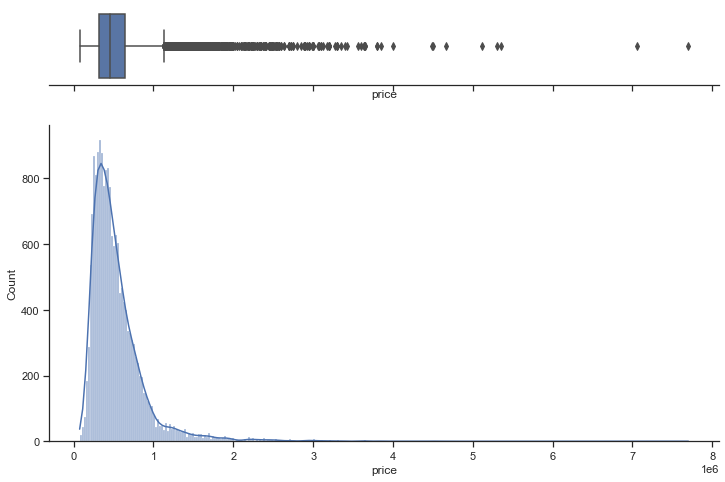

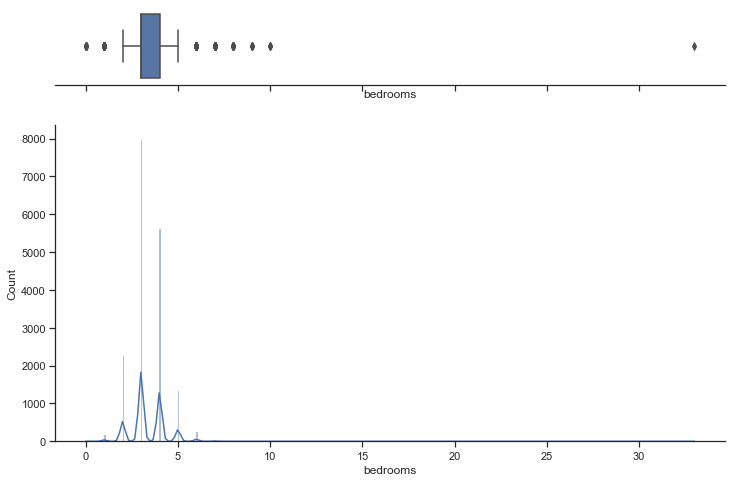

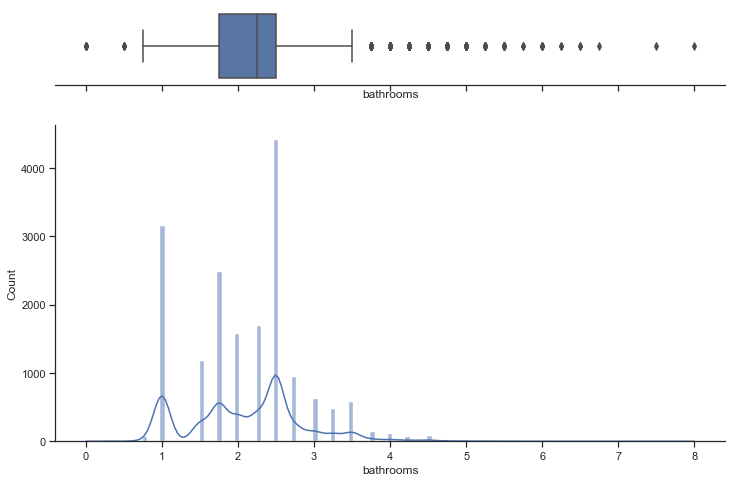

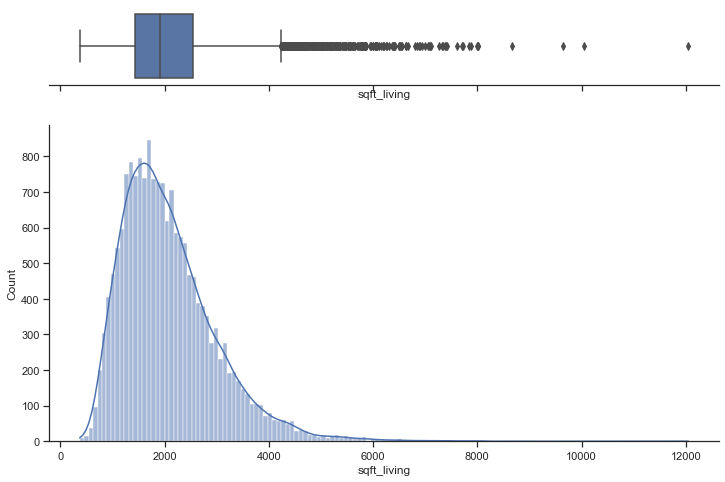

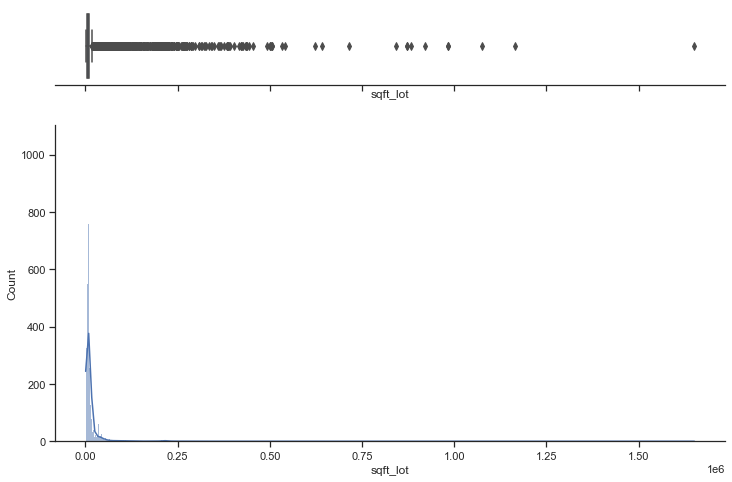

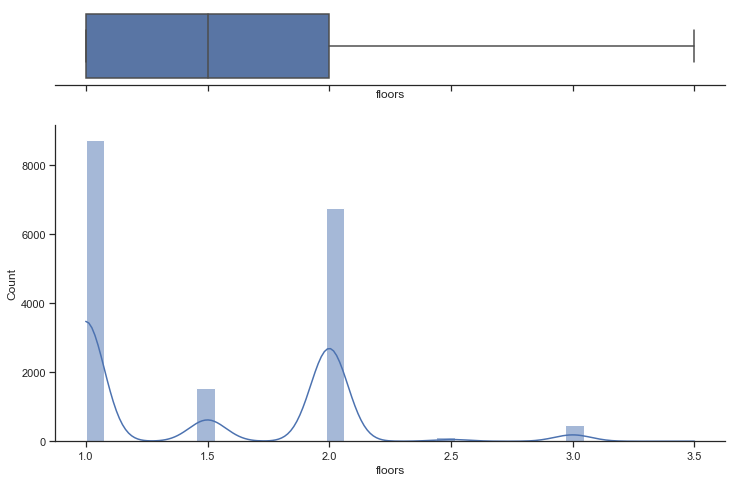

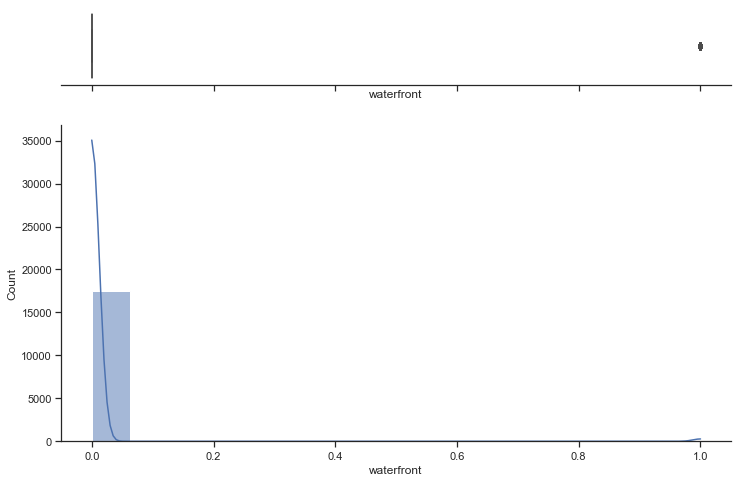

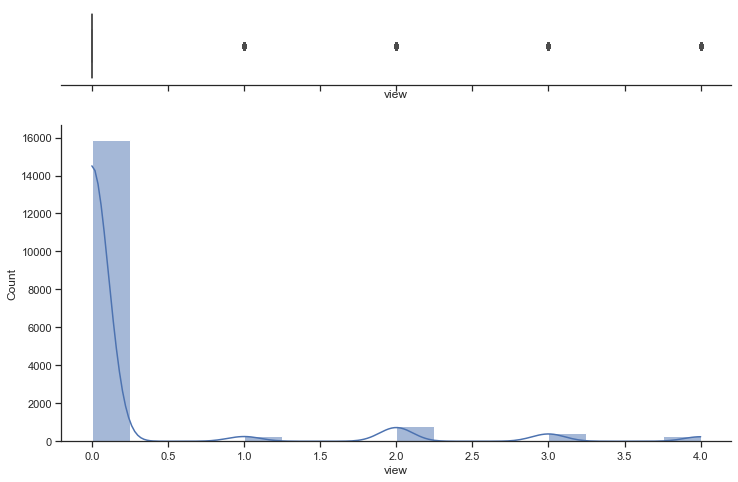

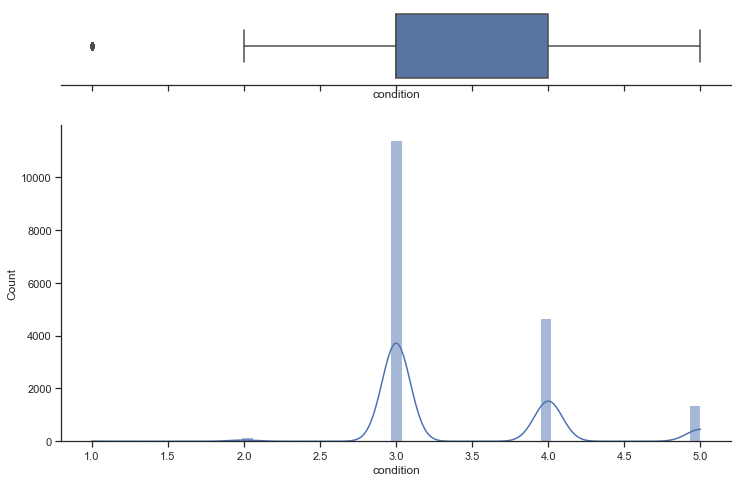

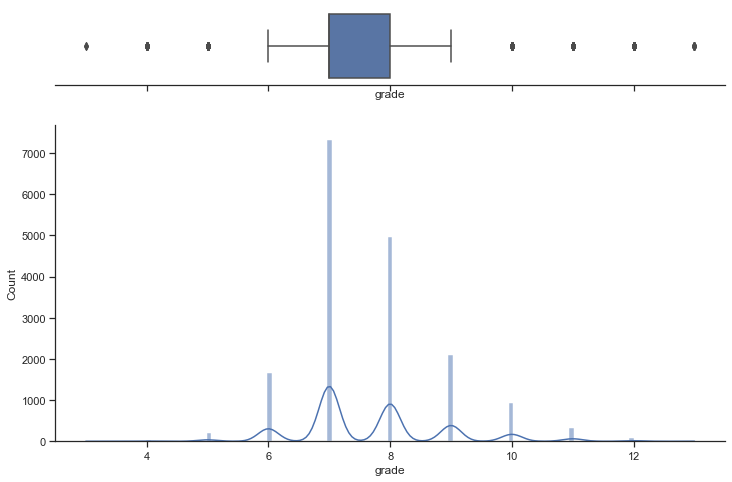

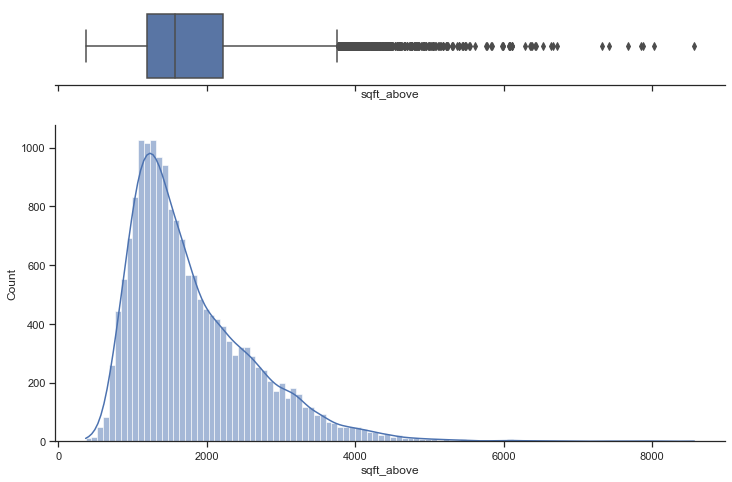

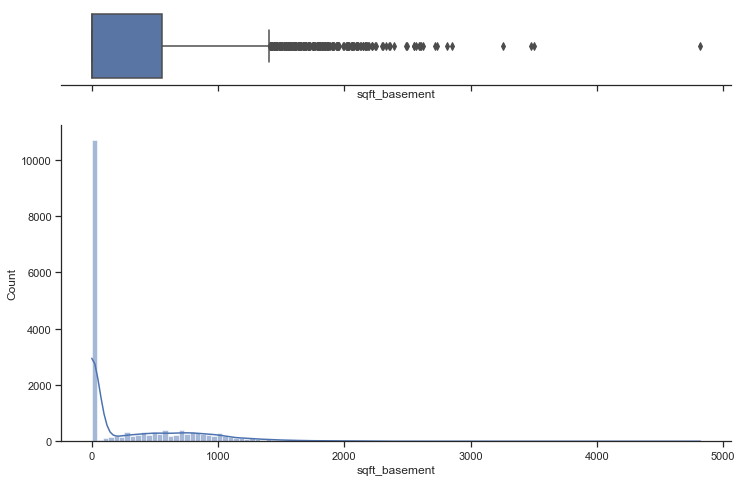

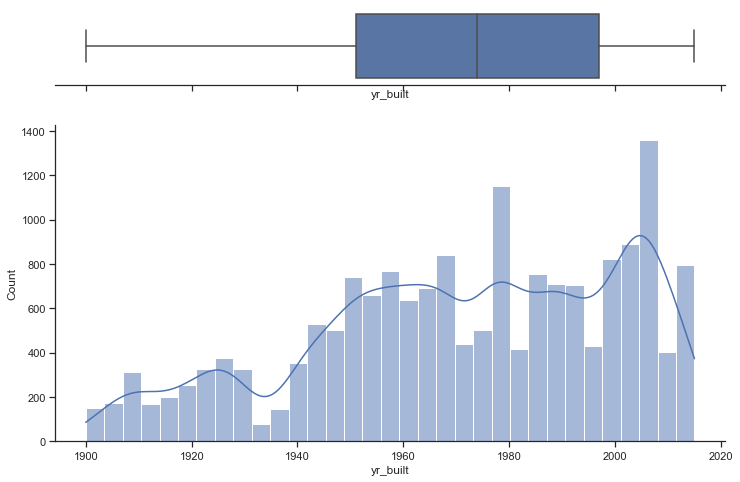

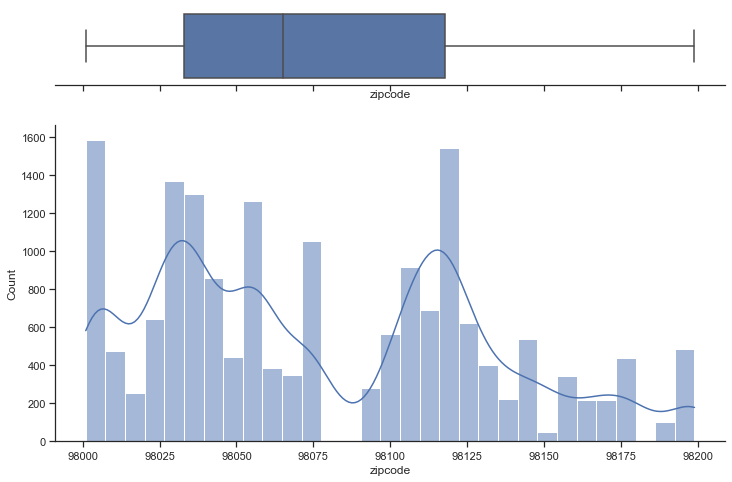

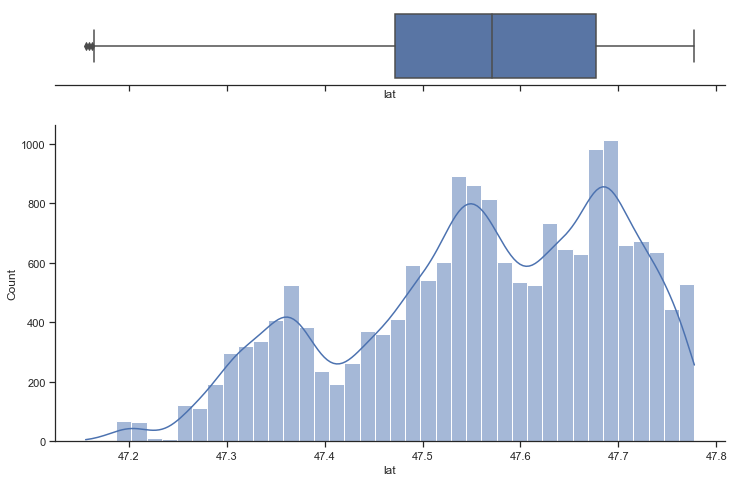

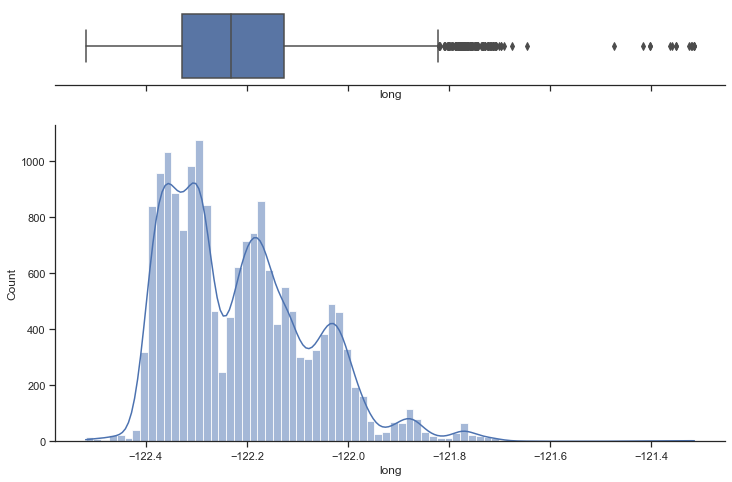

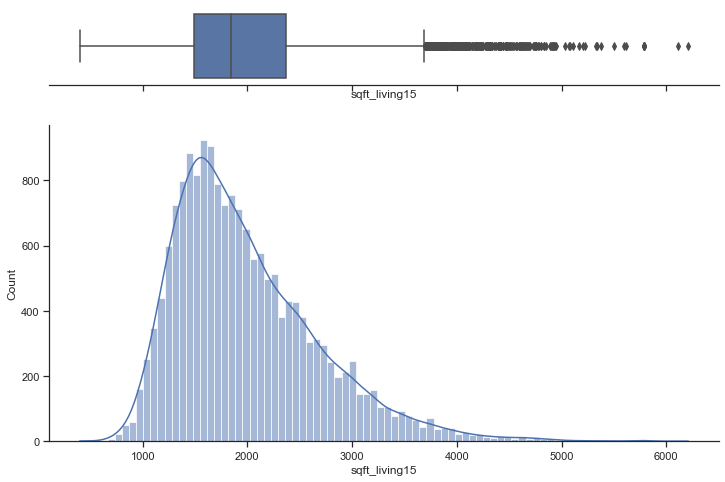

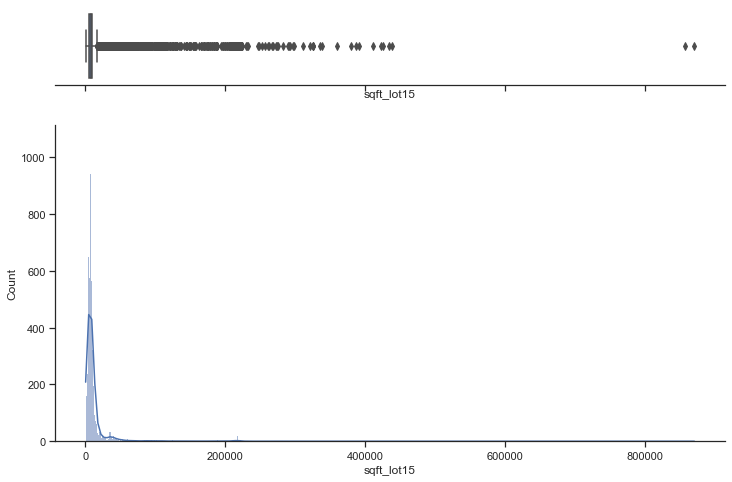

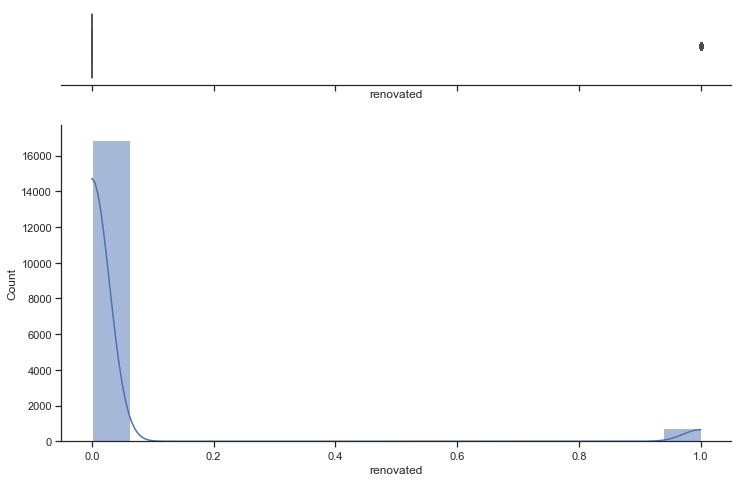

In [17]:
#Loop through attributes to display histograms and outliers
for attribute in houseSalesDF_1.columns:
    sns.set(style="ticks")

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                    gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

    sns.boxplot(x= houseSalesDF_1[attribute], ax=ax_box)
    sns.histplot(x = houseSalesDF_1[attribute], ax=ax_hist, kde=True)
    

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
 

## Detecting the outliers

### Price

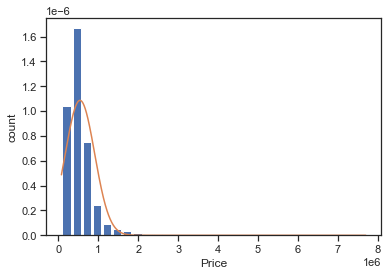

In [18]:
# price
from scipy.stats import norm
plt.hist(houseSalesDF.price,bins=30,rwidth = 0.8, density=True)
plt.xlabel('Price')
plt.ylabel('count')

rng = np.arange(houseSalesDF.price.min(), houseSalesDF.price.max(), 0.1)
plt.plot(rng ,norm.pdf(rng, houseSalesDF.price.mean(), houseSalesDF.price.std()))

In [19]:
upper_limit_pricev = houseSalesDF.price.mean() + 3*houseSalesDF.price.std()
lower_limit_pricev = houseSalesDF.price.mean() - 3*houseSalesDF.price.std()
print(upper_limit_pricev)
print(lower_limit_pricev)

1641469.731214629
-561293.4476815701


In [20]:
houseSalesDF_1[(houseSalesDF_1.price>upper_limit_pricev) | (houseSalesDF_1.price<lower_limit_pricev)].\
sort_values(by="price",ascending=False)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
7252,7700000.0,6,8.00,12050.0,27600.0,2.5,0,3,4,13,8570,3480,1910,98102,47.6298,-122.323,3940,8800,1
3914,7062500.0,5,4.50,10040.0,37325.0,2.0,1,2,3,11,7680,2360,1940,98004,47.6500,-122.214,3930,25449,1
1448,5350000.0,5,5.00,8000.0,23985.0,2.0,0,4,3,12,6720,1280,2009,98004,47.6232,-122.220,4600,21750,0
1315,5300000.0,6,6.00,7390.0,24829.0,2.0,1,4,4,12,5000,2390,1991,98040,47.5631,-122.210,4320,24619,0
1164,5110800.0,5,5.25,8010.0,45517.0,2.0,1,4,3,12,5990,2020,1999,98033,47.6767,-122.211,3430,26788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,1650000.0,4,2.50,2780.0,11904.0,1.0,0,1,5,8,1730,1050,1951,98004,47.6209,-122.216,3590,13860,0
3777,1650000.0,5,4.00,3310.0,8400.0,2.0,0,0,3,10,3310,0,2000,98033,47.6914,-122.214,3430,8400,0
18511,1650000.0,4,2.75,3190.0,14904.0,1.0,0,3,4,9,1940,1250,1949,98004,47.6178,-122.214,2600,11195,1
9737,1648000.0,4,3.50,4610.0,12500.0,2.0,0,2,3,11,4610,0,2003,98033,47.6508,-122.203,2340,11538,0


### Bedrooms

In [21]:
houseSalesDF_1.bedrooms.describe()

count    17618.000000
mean         3.375071
std          0.936465
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

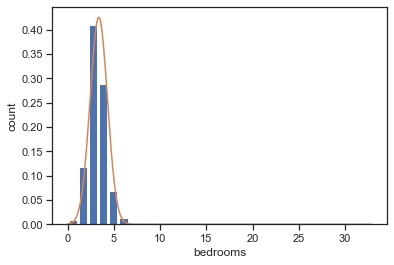

In [22]:
# bedrooms
from scipy.stats import norm
plt.hist(houseSalesDF_clean.bedrooms,bins=30,rwidth = 0.8, density=True)
plt.xlabel('bedrooms')
plt.ylabel('count')

rng = np.arange(houseSalesDF_clean.bedrooms.min(), houseSalesDF_clean.bedrooms.max(), 0.1)
plt.plot(rng ,norm.pdf(rng, houseSalesDF_clean.bedrooms.mean(), houseSalesDF_clean.bedrooms.std()))

In [23]:
upper_limit_bedv = houseSalesDF_clean.bedrooms.mean() + 3*houseSalesDF_clean.bedrooms.std()
lower_limit_bedv = houseSalesDF_clean.bedrooms.mean() - 3*houseSalesDF_clean.bedrooms.std()
print(upper_limit_bedv)
print(lower_limit_bedv)

6.184466756996445
0.5656751433327645


In [24]:
houseSalesDF_clean[(houseSalesDF_clean.bedrooms>upper_limit_bedv) | (houseSalesDF_clean.bedrooms<lower_limit_bedv)].\
sort_values(by='bedrooms',ascending=False).head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
15870,2014-06-25,640000.0,33,1.75,1620.0,6000.0,1.0,0,0,5,7,1040,580,1947,98103,47.6878,-122.331,1330,4700,0
19254,2014-12-29,660000.0,10,3.00,2920.0,3745.0,2.0,0,0,4,7,1860,1060,1913,98105,47.6635,-122.320,1810,3745,0
13314,2014-08-14,1148000.0,10,5.25,4590.0,10920.0,1.0,0,2,3,9,2500,2090,2008,98004,47.5861,-122.113,2730,10400,0
15161,2014-10-29,650000.0,10,2.00,3610.0,11914.0,2.0,0,0,4,7,3010,600,1958,98006,47.5705,-122.175,2040,11914,0
16844,2015-03-17,1400000.0,9,4.00,4620.0,5508.0,2.5,0,0,3,11,3870,750,1915,98105,47.6684,-122.309,2710,4320,0


### Bathrooms

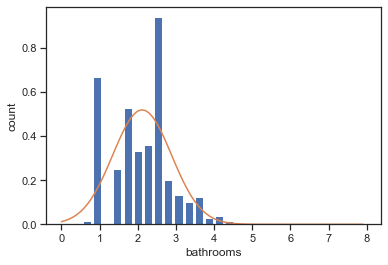

In [25]:
# bathrooms
from scipy.stats import norm
plt.hist(houseSalesDF_clean.bathrooms,bins=30,rwidth = 0.8, density=True)
plt.xlabel('bathrooms')
plt.ylabel('count')

rng = np.arange(houseSalesDF_clean.bathrooms.min(), houseSalesDF_clean.bathrooms.max(), 0.1)
plt.plot(rng ,norm.pdf(rng, houseSalesDF_clean.bathrooms.mean(), houseSalesDF_clean.bathrooms.std()))

In [26]:
upper_limit_bathv = houseSalesDF_clean.bathrooms.mean() + 3*houseSalesDF_clean.bathrooms.std()
lower_limit_bathv = houseSalesDF_clean.bathrooms.mean() - 3*houseSalesDF_clean.bathrooms.std()
print(upper_limit_bathv)
print(lower_limit_bathv)

4.420924084565458
-0.19243617447350658


In [27]:
houseSalesDF_clean[(houseSalesDF_clean.bathrooms>upper_limit_bathv) | (houseSalesDF_clean.bathrooms<lower_limit_bathv)].sort_values(by="bathrooms",ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
7252,2014-10-13,7700000.0,6,8.00,12050.0,27600.0,2.5,0,3,4,13,8570,3480,1910,98102,47.6298,-122.323,3940,8800,1
8546,2014-08-11,450000.0,9,7.50,4050.0,6504.0,2.0,0,0,3,7,4050,0,1996,98144,47.5923,-122.301,1448,3866,0
8092,2014-06-17,4668000.0,5,6.75,9640.0,13068.0,1.0,1,4,3,12,4820,4820,1983,98040,47.5570,-122.210,3270,10454,1
21506,2014-05-09,2238890.0,5,6.50,7270.0,130017.0,2.0,0,0,3,12,6420,850,2010,98027,47.5371,-121.982,1800,44890,0
20578,2015-03-28,1180000.0,6,6.50,6260.0,10955.0,2.0,0,0,3,11,4840,1420,2007,98075,47.5947,-122.039,2710,12550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2014-11-18,1565000.0,5,4.50,5220.0,67319.0,2.0,0,0,3,11,5220,0,2001,98072,47.7666,-122.128,4190,40609,0
9115,2015-01-21,682500.0,6,4.50,3500.0,8504.0,2.0,0,0,3,7,3500,0,1980,98155,47.7351,-122.295,1550,8460,0
9114,2014-09-17,350000.0,6,4.50,3500.0,8504.0,2.0,0,0,3,7,3500,0,1980,98155,47.7351,-122.295,1550,8460,0
8191,2014-05-13,2450000.0,4,4.50,5030.0,11023.0,2.0,0,2,3,11,3250,1780,2008,98040,47.5722,-122.236,3640,11490,0


### View

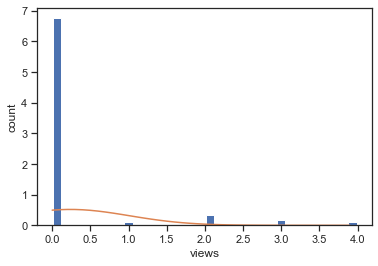

In [28]:
# view
from scipy.stats import norm
plt.hist(houseSalesDF_clean.view,bins=30,rwidth = 0.8, density=True)
plt.xlabel('views')
plt.ylabel('count')

rng = np.arange(houseSalesDF_clean.view.min(), houseSalesDF_clean.view.max(), 0.1)
plt.plot(rng ,norm.pdf(rng, houseSalesDF_clean.view.mean(), houseSalesDF_clean.view.std()))

In [29]:
upper_limit_viewv = houseSalesDF_clean.view.mean() + 3*houseSalesDF_clean.view.std()
lower_limit_viewv = houseSalesDF_clean.view.mean() - 3*houseSalesDF_clean.view.std()
print(upper_limit_viewv)
print(lower_limit_viewv)

2.5494795210470635
-2.0750783404363244


In [30]:
houseSalesDF_clean[(houseSalesDF_clean.view>upper_limit_viewv) | (houseSalesDF_clean.view<lower_limit_viewv)].sort_values(by='view',ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
21576,2015-01-07,3567000.0,5,4.50,4850.0,10584.0,2.0,1,4,3,10,3540,1310,2007,98008,47.5943,-122.110,3470,18270,0
8174,2015-02-12,1625000.0,4,3.75,4410.0,8112.0,3.0,0,4,3,11,3570,840,2003,98116,47.5888,-122.392,2770,5750,0
8156,2014-05-22,503000.0,2,1.75,2860.0,59612.0,1.0,1,4,3,8,1510,1350,1948,98023,47.3276,-122.389,2720,59612,1
8148,2014-12-17,1250000.0,4,2.75,4120.0,12500.0,1.0,0,4,4,8,2060,2060,1947,98116,47.5914,-122.385,3680,5000,0
8092,2014-06-17,4668000.0,5,6.75,9640.0,13068.0,1.0,1,4,3,12,4820,4820,1983,98040,47.5570,-122.210,3270,10454,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,2015-04-17,579000.0,3,2.50,3160.0,286181.0,2.0,0,3,3,9,3160,0,2002,98010,47.3401,-121.946,2110,94663,0
8163,2015-03-19,1452000.0,2,3.25,2070.0,3128.0,2.0,1,3,3,9,1760,310,1988,98075,47.5686,-122.060,2740,3568,0
8136,2014-10-09,1511250.0,3,2.50,4010.0,12105.0,1.0,0,3,5,11,2600,1410,1983,98006,47.5540,-122.151,4010,15081,0
8030,2015-04-01,920000.0,5,4.50,3820.0,5750.0,2.0,0,3,3,9,2830,990,2000,98116,47.5581,-122.385,1750,5750,0


### Sqft_lot

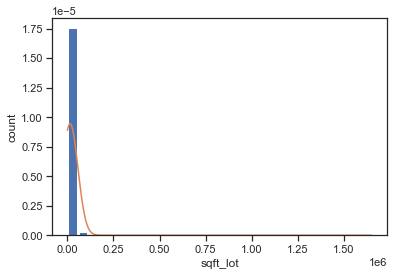

In [31]:
# waterfront
from scipy.stats import norm
plt.hist(houseSalesDF_clean.sqft_lot,bins=30,rwidth = 0.8, density=True)
plt.xlabel('sqft_lot')
plt.ylabel('count')

rng = np.arange(houseSalesDF_clean.sqft_lot.min(), houseSalesDF_clean.sqft_lot.max(), 0.1)
plt.plot(rng ,norm.pdf(rng, houseSalesDF_clean.sqft_lot.mean(), houseSalesDF_clean.sqft_lot.std()))

In [32]:
upper_limit_sqftv = houseSalesDF_clean.sqft_lot.mean() + 3*houseSalesDF_clean.sqft_lot.std()
lower_limit_sqftv = houseSalesDF_clean.sqft_lot.mean() - 3*houseSalesDF_clean.sqft_lot.std()
print(upper_limit_sqftv)
print(lower_limit_sqftv)

142006.77796454966
-111725.07391187626


In [33]:
houseSalesDF_clean[(houseSalesDF_clean.sqft_lot>upper_limit_sqftv) | (houseSalesDF_clean.sqft_lot<lower_limit_sqftv)].sort_values(by='sqft_lot',ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1719,2015-03-27,700000.0,4,1.00,1300.0,1651359.0,1.0,0,3,4,6,1300,0,1920,98022,47.2313,-122.023,2560,425581,0
17319,2015-05-04,190000.0,2,1.00,710.0,1164794.0,1.0,0,0,2,5,710,0,1915,98014,47.6888,-121.909,1680,16730,0
7647,2014-05-21,542500.0,5,3.25,3010.0,1074218.0,1.5,0,0,5,8,2010,1000,1931,98027,47.4564,-122.004,2450,68825,0
3949,2014-09-05,998000.0,4,3.25,3770.0,982998.0,2.0,0,0,3,10,3770,0,1992,98058,47.4140,-122.087,2290,37141,0
4441,2014-07-30,790000.0,2,3.00,2560.0,982278.0,1.0,0,0,3,8,2560,0,2004,98014,47.6955,-121.861,1620,40946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,2014-09-25,465000.0,3,1.00,1100.0,145490.0,1.5,0,0,4,6,1100,0,1915,98024,47.5697,-121.898,1100,11610,0
19680,2015-03-03,465000.0,3,2.50,1920.0,144619.0,1.0,0,0,3,8,1920,0,2014,98022,47.2683,-121.946,2010,48787,0
16914,2014-11-10,425000.0,3,1.75,1610.0,144619.0,1.0,0,0,3,7,1610,0,1977,98024,47.5659,-121.863,2220,144619,0
19072,2015-02-03,425000.0,3,2.50,2650.0,144183.0,1.0,0,0,3,8,2650,0,1967,98042,47.4212,-122.144,1940,41210,0


An easy way to assess the effects of an outlier is to run the model twice:  One time with the outlier and the second time without the outliers.  If there is little difference then I would include, if not I would exclude.

## Visualization 

In [34]:
# Extract year, month, and month year from the date
houseSalesDF["Year"] = pd.DatetimeIndex(houseSalesDF["date"]).year
houseSalesDF["Month"] = pd.DatetimeIndex(houseSalesDF["date"]).month
houseSalesDF['Month_Year'] = pd.to_datetime(houseSalesDF['date']).dt.to_period('M')
houseSalesDF.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Month_Year
0,2014-10-13,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,2014-10
1,2014-12-09,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,2014-12
2,2015-02-25,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2015-02
3,2014-12-09,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,2014-12
4,2015-02-18,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2015-02


In [35]:
sqft = houseSalesDF.loc[:,['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
sqft

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1180.0,5650.0,1340,5650
1,2570.0,7242.0,1690,7639
2,770.0,10000.0,2720,8062
3,1960.0,5000.0,1360,5000
4,1680.0,8080.0,1800,7503
...,...,...,...,...
21608,1530.0,1131.0,1530,1509
21609,2310.0,5813.0,1830,7200
21610,1020.0,1350.0,1020,2007
21611,1600.0,2388.0,1410,1287


<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living15'>

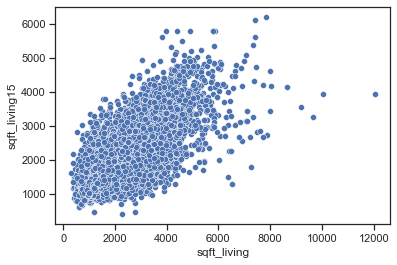

In [36]:
# what is the difference between sqft_living
sns.scatterplot(data=sqft, x=sqft['sqft_living'], y=sqft['sqft_living15'])

<AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot15'>

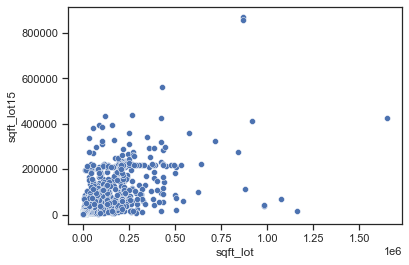

In [37]:
sns.scatterplot(data=sqft, x=sqft['sqft_lot'], y=sqft['sqft_lot15'])

In [38]:
sqft.corr()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
sqft_living,1.000000,0.168363,0.756901,0.181697
sqft_lot,0.168363,1.000000,0.145112,0.728800
sqft_living15,0.756901,0.145112,1.000000,0.183192
sqft_lot15,0.181697,0.728800,0.183192,1.000000


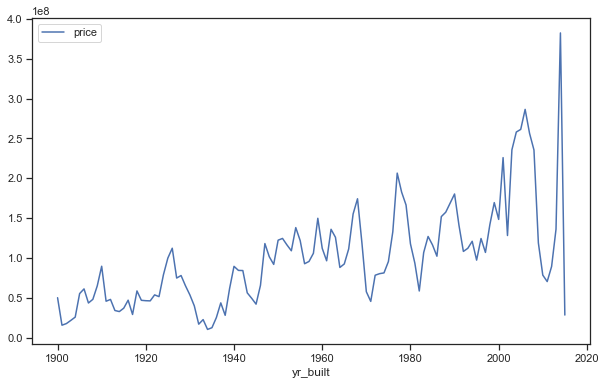

In [39]:
# Plotting Price rate versus year
month_year_group = houseSalesDF.groupby("yr_built")['price'].sum().plot(legend=True,figsize=(10,6))

As we can see from the above line chart, the house price has been increasing from 1900. 

### Bar charts for comparing different columns with the price

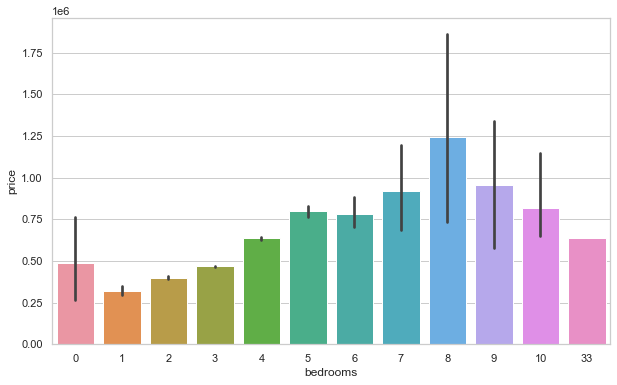

In [40]:
# Bedrooms versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10,6), sharex=True)
ax = sns.barplot(x="bedrooms", y="price", data=houseSalesDF_clean)

As we can see from the bar chart of bedrooms versus price, the more number of bedrooms a house has higher is the price of the house.

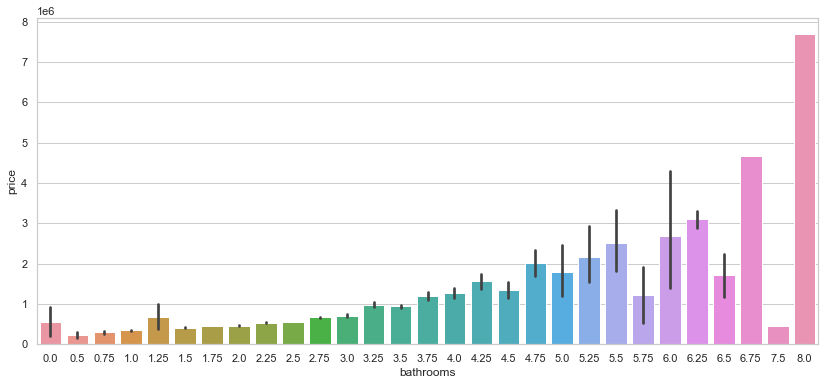

In [41]:
# Bathrooms versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(14,6), sharex=True)
ax = sns.barplot(x="bathrooms", y="price", data=houseSalesDF_clean)

As we can see from the bar chart of bathrooms versus price, the more number of bathrooms a house has higher is the price of the house. From the chart we can understand that there is a positive correlation between the price and number of bathrooms. 

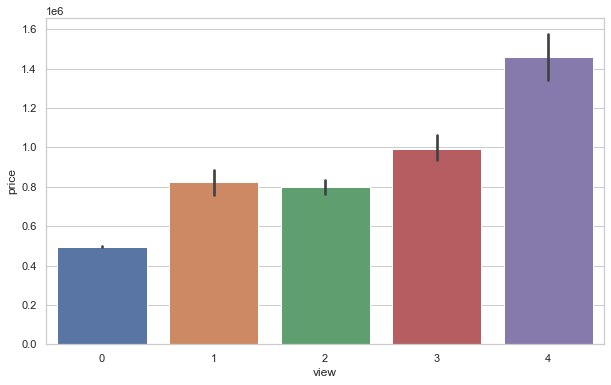

In [42]:
# view versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10,6), sharex=True)
ax = sns.barplot(x="view", y="price", data=houseSalesDF_clean)

Houses with more view tend to have a higher prices.

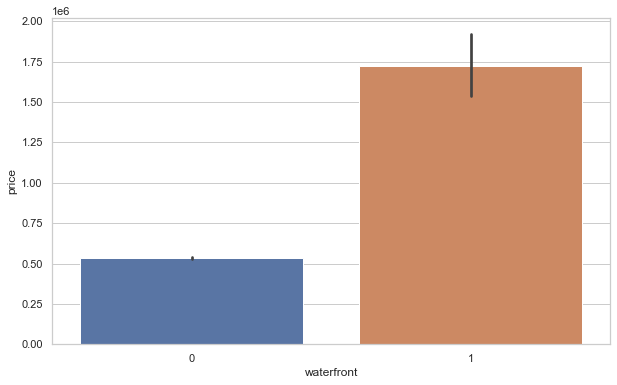

In [43]:
# waterfront versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10,6), sharex=True)
ax = sns.barplot(x="waterfront", y="price", data=houseSalesDF_clean)

The waterfron bar chart shows a higher price for houses which they have a waterfront. 

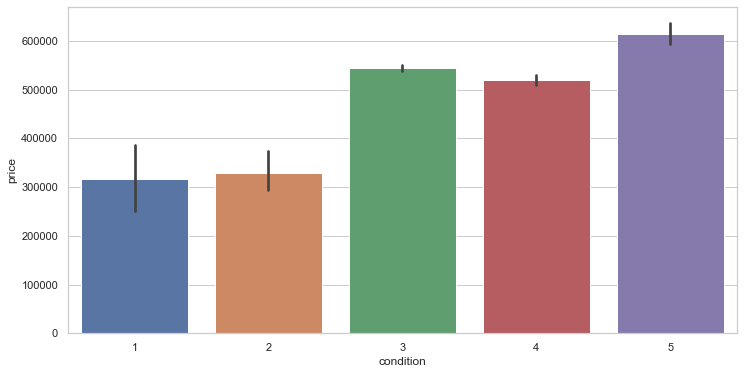

In [44]:
# condition versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x="condition", y="price", data=houseSalesDF_clean)

The number of condition denote the level of the house condition. A higher number of condition shows a higher price for houses. 

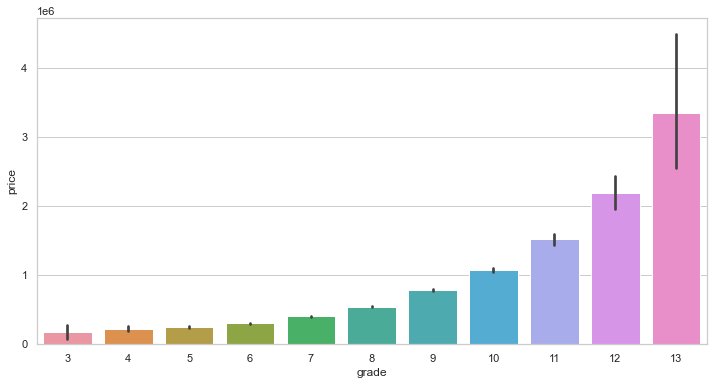

In [45]:
# grade versus price
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x="grade", y="price", data=houseSalesDF_clean)

In [59]:
# house grade pie chart
grade_group = pd.DataFrame({'grade_counts':houseSalesDF_clean.groupby("grade").size()}).reset_index()
grade_group.sort_values(by="grade_counts",ascending=False)

,grade,grade_counts
4,7,7316
5,8,4967
6,9,2103
3,6,1665
7,10,925
8,11,333
2,5,194
9,12,78
1,4,25
10,13,10


<AxesSubplot:xlabel='grade', ylabel='Count'>

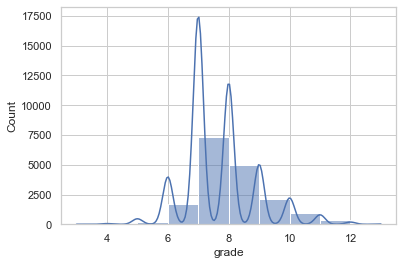

In [77]:
fig = px.pie(grade_group, values='grade_counts', names='grade',title='House Grades by Grade Counts')
fig.show()

sns.histplot(data=houseSalesDF_clean, x="grade", kde=True, bins=10)

The proportion of grade 7 is the most among the other grades with 41.5%. From the histogram we can understand that the most of the houses are graded between 6 to 9.

In [ ]:
# Plot correlation Matrix Index
corr = houseSalesDF_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

As we can understand from the correlation matrix index, there is a significant association between the variables, that they have a darker box. Red box and light red is the indication of positive correlation, and blue and light blue is an indication of negative correlation. 

### Correlation between price and different columns

In [ ]:
# Let's find out the correlation between price and other values
price_corr = houseSalesDF.corr()["price"].sort_values(ascending=False)
price_corrdf = price_corr.reset_index(name="corr")
price_corrdf.head(10)

In [ ]:
# high correlation is between 0.7 - 1.0
high_price_corr = price_corrdf[price_corrdf["corr"] > 0.7]
high_price_corr.rename(columns={'index':'attribute'})

In [ ]:
# Moderate correlation is between 0.5 - 0.7
moderate_price_corr = price_corrdf[(price_corrdf["corr"]>0.5) & (price_corrdf['corr']<0.7)]
moderate_price_corr.rename(columns={'index':'attribute'})

In [ ]:
# Weak correlation is between 0.0 - 0.5
weak_price_corr = price_corrdf[(price_corrdf['corr']<0.5) & (price_corrdf['corr']>0)]
weak_price_corr.rename(columns={'index':'attribute'})

In [ ]:
# negative correlation is less than 0
negative_price_corr = price_corrdf[price_corrdf['corr'] < 0]
negative_price_corr.rename(columns={'index':'attribute'})